<a href="https://colab.research.google.com/github/Thitichaya2000/multivariate/blob/main/Multivariate_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ให้นักศึกษาทำข้อสอบใน Colab Notebook นี้โดยกรอกข้อมูลของตัวเองใน cell ที่ 2 แล้วรัน cell ที่ 1 - 5 และเริ่มทำข้อสอบใน cell ที่ 6 เป็นต้นไป

โดยโจทย์คือ
1. ข้อมูลโจทย์ อยู่ใน ตัวแปร ```Data```
2. ทำ clustering แล้วทำ visualize ข้อมูลแบบ 2 มิติ
3. ลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering แล้ว visualize ข้อมูลแบบ 2 มิติ
4. เปรียบเทียบความแตกต่างของผลข้อ 2. กับ ข้อ 3.
5. เขียน comments อธิบายทุกขั้นตอน
6. อัด video อธิบาย code ทุกๆขั้นตอนรวมถึงผลแล้วอัพลง youtube ในรูปแบบ unlist 
7. commit โดยใช้ชื่อ commit เป็น link youtube ที่อธิบาย code ในข้อ 6.

กำหนดส่งวันที่ 2 พฤษภาคม 2564 (โดยให้มากรอกวันที่ commit ครั้งสุดท้ายใน sheet: https://docs.google.com/spreadsheets/d/1_qJwLDJVtOW1HxBcf_FHVc6UT4J_SOonuR6o3EEnVzw/edit?usp=sharing ช่อง Final)

In [4]:
from sklearn.datasets import make_blobs
import random,math
import numpy as np
import pandas 
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA

In [5]:
Name = 'ฐิติชญา ไกรวงค์'
ID = '623020520-0'

In [6]:
def DataGenerator(name,id):
    random.seed(int(id[3:6]))
    numfeat = random.randint(20,30)
    ct = random.randint(len(name)-6,len(name))
    
    X, y = make_blobs(n_samples=10000, centers=ct, n_features=numfeat , random_state=int(id[3:6]))

    print(f'{id[3:6]}:{numfeat}:{ct}')
    X_t = (X[:,1]*2)+int(id[3])
    X_t2 = (X[:,-1]*5)+int(id[4])

    DT = np.append(X,X_t.reshape([10000,1]),axis=1)
    DT = np.append(DT,X_t2.reshape([10000,1]),axis=1)
    
    return pandas.DataFrame(DT)

In [7]:
Data = DataGenerator(Name,ID)

020:30:15


In [8]:
Data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,-1.431317,-3.805310,-1.683298,3.670962,5.333743,6.968222,5.297155,-0.622868,-8.659695,0.506338,-2.231758,-4.966134,2.878114,7.374850,1.860676,-0.038871,2.196023,11.370829,6.688385,6.105780,-4.416389,-4.717553,9.194900,0.249966,-1.970441,4.105653,3.420734,4.639702,-1.725424,9.603881,-7.610621,50.019407
1,-0.222700,-4.318604,-1.021648,4.262164,4.447866,10.645853,4.765258,-0.790480,-8.108423,-1.114622,-2.005512,-5.068586,4.139944,7.948390,4.017807,1.361718,3.219721,8.928908,6.658795,5.475026,-4.660510,-4.876859,7.906575,-0.422501,-2.430645,1.426361,4.555166,5.161480,-1.333644,9.095333,-8.637208,47.476663
2,-10.034376,6.161892,-3.954476,-8.050792,-5.352337,6.411617,-6.332182,-7.345645,-7.169272,10.553513,2.975710,0.441505,1.776539,7.340909,0.620935,3.145672,5.817364,8.331761,-8.568314,-4.763978,7.189534,0.715256,-2.086542,3.539530,0.488147,-3.906897,5.546570,-6.069777,7.307131,-8.493889,12.323783,-40.469445
3,2.807811,3.136014,3.270353,6.546945,-5.862550,-12.552502,6.869210,4.978822,-0.880895,7.677638,-2.179459,6.689613,5.866614,2.598473,11.440434,9.917409,6.283930,-1.044869,-11.599362,7.609711,-8.686592,-3.201546,-5.693836,10.478092,-5.883031,-4.733943,-2.132558,-9.512157,0.184631,-8.506297,6.272028,-40.531484
4,0.981739,5.057586,6.035421,6.643368,-9.726732,7.433159,8.389728,-5.688372,4.057948,-1.067151,-0.113727,3.773041,7.207748,8.921411,9.088559,3.895733,-7.498781,8.757467,-2.416330,4.642086,7.698492,-0.165685,6.799617,9.441419,10.733818,-3.927096,-4.872414,-7.582712,-0.734257,7.437834,10.115172,39.189171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,8.570252,-8.547499,-6.627521,-0.738247,5.041646,8.379100,8.531765,1.861021,-1.478735,-1.421689,4.005371,2.120472,5.035665,-3.002748,8.055580,7.182527,-6.023813,2.258496,7.288834,-8.409583,-10.399815,7.948018,5.700540,6.105651,7.671632,-3.864644,-7.989939,5.141135,-1.598991,5.689240,-17.094999,30.446201
9996,-10.438886,5.510990,-1.623076,-9.326215,-6.385069,6.938657,-6.563878,-8.289501,-5.761271,7.928461,3.251750,1.482022,1.123383,5.989536,1.200461,0.735872,4.707533,8.231279,-10.546153,-4.309346,5.425850,2.465032,-3.326625,1.770823,2.090981,-3.050056,6.267379,-6.057672,8.780392,-10.478475,11.021979,-50.392375
9997,-2.171386,-3.572374,-2.281624,9.609861,3.647927,-7.071517,5.912975,-1.965732,6.946705,-2.177729,-5.651136,-0.720117,-7.696067,-6.032868,-3.678252,2.299576,-0.520670,6.917413,1.350440,-7.531208,6.656311,-5.945639,-10.804183,-1.086603,5.390014,-5.256982,-3.354696,9.149446,9.679640,3.251425,-7.144748,18.257126
9998,0.578091,6.232268,5.490281,5.679421,-9.322961,7.872634,8.821317,-4.478623,6.994061,-1.793188,0.012370,3.955197,8.481484,6.869151,11.919347,2.971310,-9.245483,6.041311,-1.832211,3.352620,8.421936,0.247541,7.469489,9.172441,11.945841,-4.429715,-6.446364,-4.332076,0.118959,7.302469,12.464536,38.512345


ทำการเตรียมข้อมูลก่อนจะนำข้อมูลไปใช้ โดยการตัดตัวที่มี correlation กันออกไป เพื่อลดข้อมูลที่เหมือนกันออกจาก Data

In [9]:
Data.shape #ขนาดของข้อมูล

(10000, 32)

In [10]:
corr = np.corrcoef(Data.to_numpy().T)

In [11]:
corr.shape #ขนาดของ corrcoef ของ Data

(32, 32)

In [12]:
#ทำการวนลูปหาค่า correlation ที่ซ้ำกัน
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        if (i !=j) and (corr[i,j] == 1.):
            print(f'row = {i} column = {j} corrcoef = {corr[i,j]}')

row = 1 column = 30 corrcoef = 1.0
row = 29 column = 31 corrcoef = 1.0
row = 30 column = 1 corrcoef = 1.0
row = 31 column = 29 corrcoef = 1.0


จากการวนลูป พบว่า correlation ไม่มีตัวซ้ำกัน จึงไม่จำเป็นตั้งตัดข้อมูลใดออก ดังนั้นข้อมูล Data จึงนำไปใช้ได้เลย

1.ทำการ clustering data แล้วทำ visualize ให้ข้อมูลออกมาในรูปแบบ 2 มิติ

In [13]:
from sklearn.cluster import KMeans
#import function ที่ต้องการใช้ในการทำ K-mean 

In [14]:
kmeans = KMeans(n_clusters=3,random_state=2021) #Defind ทำการกำหนดค่า k ที่เราต้องการ 

In [15]:
kmeans.fit(Data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2021, tol=0.0001, verbose=0)

In [16]:
kmeans.cluster_centers_ #แสดงจุดที่คำนวณได้

array([[ 1.27368952e+00,  2.69721312e+00, -2.18861418e+00,
         1.52049597e+00,  1.35948763e+00, -1.66342049e+00,
         2.66935986e+00,  2.12110594e+00,  3.97591973e+00,
        -2.26167165e+00,  6.99883575e-01, -3.85316449e-01,
        -1.36166225e+00, -1.15609100e+00, -3.94378168e+00,
        -4.05717315e-01, -4.85074635e-02,  1.73272007e+00,
         1.48231748e+00, -1.82873887e+00,  1.04893095e+00,
        -9.98687639e-01, -4.45434330e-01, -2.24636768e+00,
         3.91775303e+00, -3.05079689e+00,  5.11040188e-01,
         2.01566556e+00,  1.31604442e+00,  2.33661803e+00,
         5.39442623e+00,  1.36830902e+01],
       [-1.95455906e+00,  7.94491819e-01,  3.33008156e-02,
        -1.03548443e+00,  6.05310320e-01, -2.90237233e+00,
        -1.51176216e+00, -3.07488307e+00, -2.45356592e+00,
         3.03728067e+00, -1.05565746e+00,  3.74117892e+00,
         3.86391944e+00,  3.43520462e+00,  9.19527635e-01,
         4.78632917e+00,  5.14215577e+00,  1.92097748e+00,
        -8.14

In [17]:
y = kmeans.predict(Data) #ทดสอบการจัดกลุ่มของ Data
y

array([2, 2, 1, ..., 0, 2, 2], dtype=int32)

ทำ PCA ลด Dimention

In [18]:
pca = PCA(n_components=2)

In [19]:
new_pca = pca.fit_transform(Data)

In [20]:
import matplotlib

In [21]:
matplotlib.rcParams['figure.figsize']=[15,20]

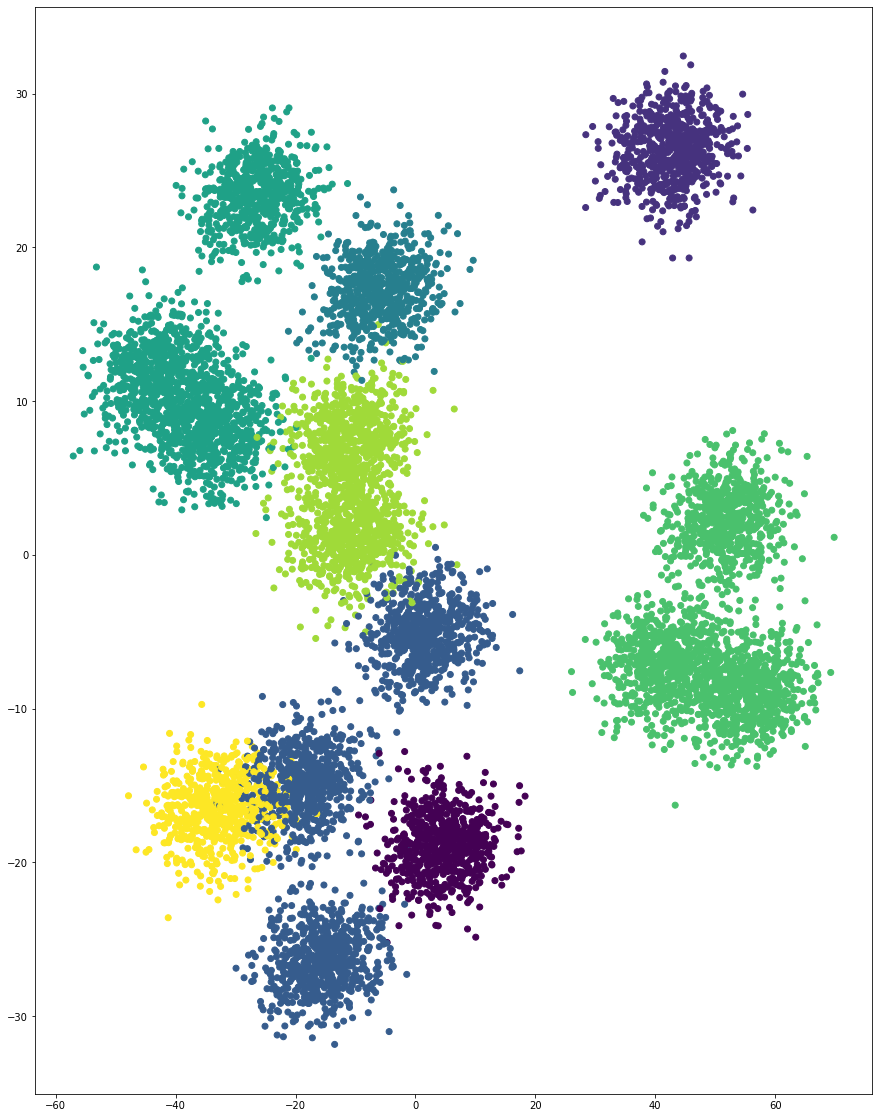

In [22]:
kmeans = KMeans(random_state=2021)
kmeans.fit(Data)
y = kmeans.predict(Data)
plt.scatter(new_pca[:,0],new_pca[:,1],c=y)

###หาค่า k ด้วยวิธี  elbow method 

In [23]:
kmeans.inertia_     #ค่าของ SSE Sum of Squared error

5136927.9223541105

In [24]:
SSE = list()
for k in [1,2,3,4,5,6,7,8]:
    kmeans = KMeans(n_clusters = k , random_state = 2021)
    XX = kmeans.fit(Data)
    SSE.append(kmeans.inertia_)

In [25]:
SSE

[20638831.92010504,
 12176335.794695133,
 10196224.23516815,
 8970661.80275478,
 7903901.912406155,
 6875446.393153721,
 6150175.424016003,
 5136927.9223541105]

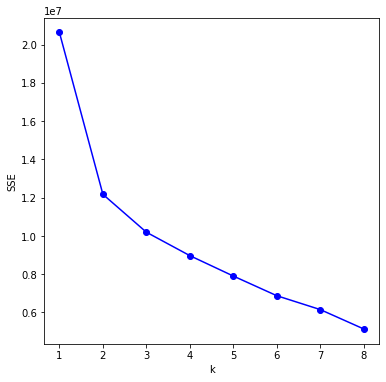

In [26]:
matplotlib.rcParams['figure.figsize']=[6,6]
plt.plot([1,2,3,4,5,6,7,8],SSE,'o-b')
plt.xlabel('k')
plt.ylabel('SSE');

k=3 กลุ่ม เพราะ k=3 อยู่ตรงข้อศอก


###หาค่า k ด้วยวิธี silhouette coefficient 

In [28]:
from sklearn import metrics 

In [29]:
SilH = list()
for k in [2,3,4,5,6,7,8]:
    kmeans = KMeans(n_clusters = k , random_state = 2021)
    kmeans.fit(Data)
    score = metrics.silhouette_score(Data,kmeans.labels_)
    SilH.append(score)

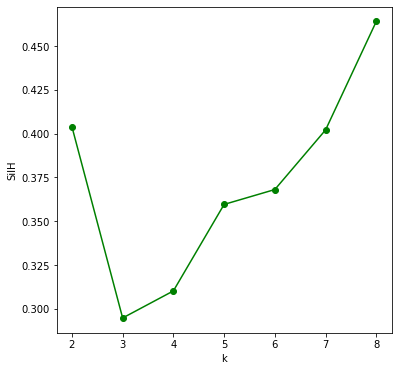

In [32]:
matplotlib.rcParams['figure.figsize']=[6,6]
plt.plot([2,3,4,5,6,7,8],SilH,'o-g')
plt.xlabel('k')
plt.ylabel('SilH');

จุดที่มี Silhouette score สูงสุดจากกราฟ k=8 จะมี Silhouette score=0.490 มีความใกล้กันของ Data ในกลุ่มเดียวกันมาก และความห่างกันของ Data แต่ละกลุ่มมาก

In [33]:
matplotlib.rcParams['figure.figsize']=[15,20] #ขยายขนาดของกราฟ 

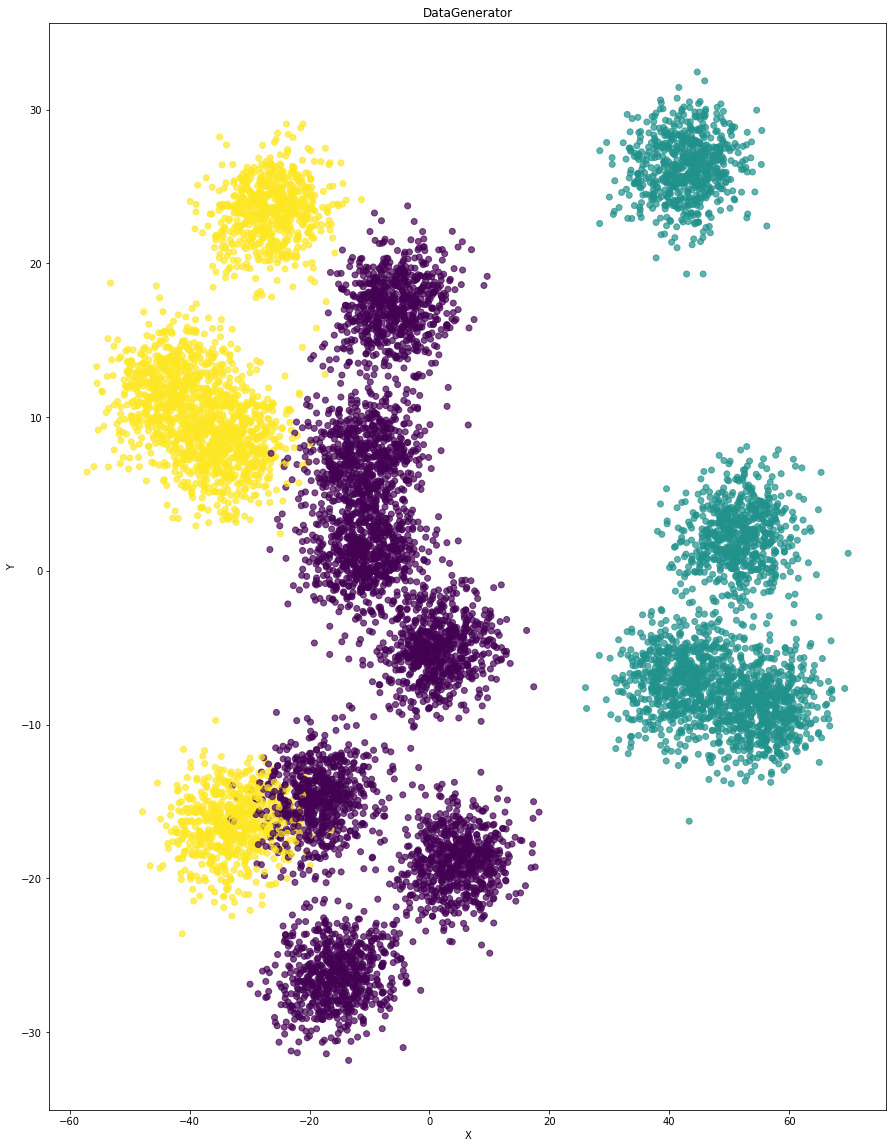

In [34]:
kmeans = KMeans(n_clusters = 3,random_state=2021)
kmeans.fit(Data)
y = kmeans.predict(Data)
plt.scatter(new_pca[:,0],new_pca[:,1],c=y,alpha=0.7)
plt.title('DataGenerator') 
plt.xlabel('X') 
plt.ylabel('Y');

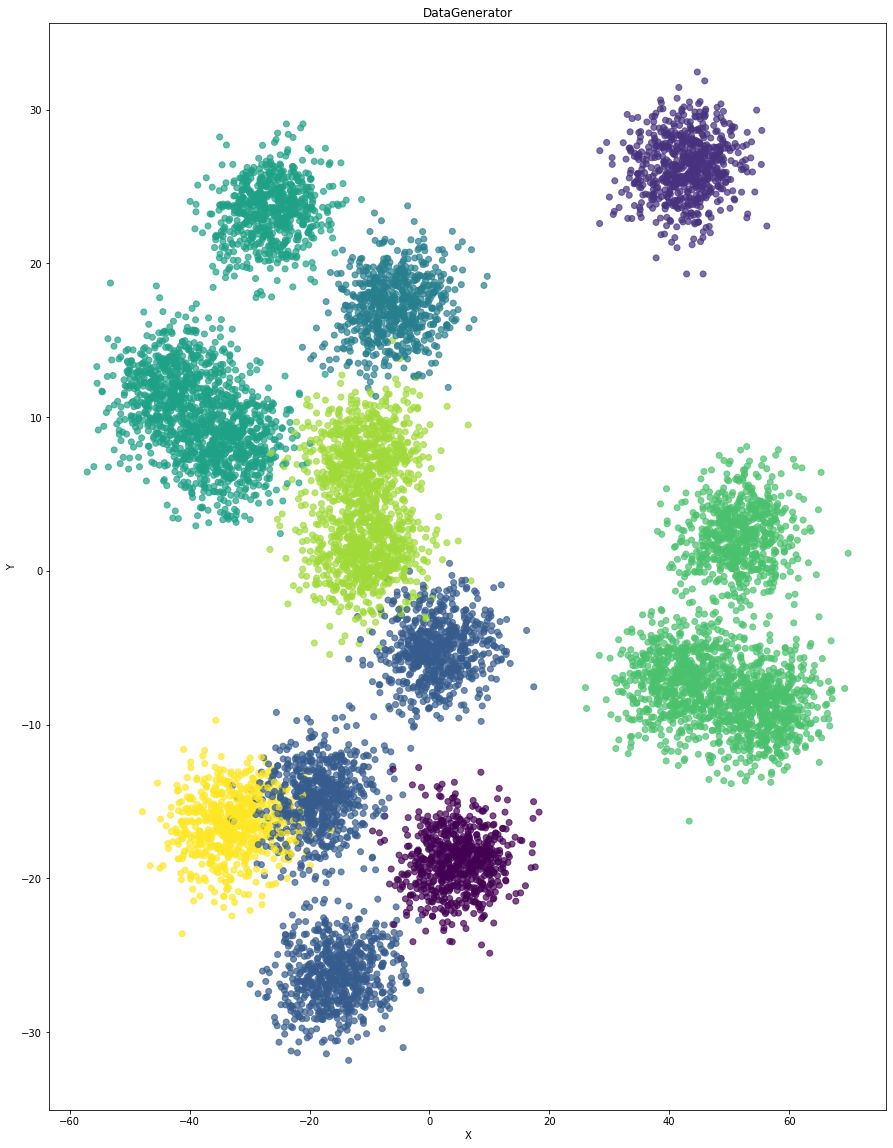

In [35]:
kmeans = KMeans(n_clusters = 8,random_state=2021)
kmeans.fit(Data)
y = kmeans.predict(Data)
plt.scatter(new_pca[:,0],new_pca[:,1],c=y,alpha=0.7)
plt.title('DataGenerator') 
plt.xlabel('X') 
plt.ylabel('Y');

***ลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering แล้ว visualize ข้อมูลแบบ 2 มิติ***

##MDS

In [36]:
from sklearn.manifold import MDS

In [37]:
mds = MDS(n_components=2)

In [ ]:
new_mds = mds.fit_transform(Data)

In [ ]:
kmeans2 = KMeans(n_clusters=4,random_state=2021)
kmeans2.fit(Data)
g = kmeans2.predict(Data)

In [ ]:
plt.scatter(new_mds[:,0],new_mds[:,1],c=g,alpha=0.7)
plt.title('DataGenerator') 
plt.xlabel('X') 
plt.ylabel('Y');

เปรียบเทียบความแตกต่างของผลข้อ 2. กับ ข้อ 3.

In [ ]:
plt.scatter(new_pca[:,0],new_pca[:,1],c=y,alpha=0.7)
plt.title('DataGenerator') 
plt.xlabel('X') 
plt.ylabel('Y');

In [ ]:
plt.scatter(new_mds[:,0],new_mds[:,1],c=g,alpha=0.7)
plt.title('DataGenerator') 
plt.xlabel('X') 
plt.ylabel('Y');